In [192]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np

In [102]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
         names=['age','workclass','fnlwgt','education','education-num',
                'marital-status','occupation','relationship','race','sex',
                'capital-gain','capital-loss','hours-per-week','native-country','salary'])

In [95]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<div class="alert alert-block alert-info">
<b>Идея:</b> Датасет переписи населения США.
<br> <br>     
<b>Features:</b> 
<br> <b>age:</b> continuous.
<br><b>workclass:</b>  Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
<br><b>fnlwgt=final weight:</b>  continuous.
<br><b>education:</b>  Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
<br><b>education-num:</b>  continuous.
<br><b>marital-status:</b>  Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
<br><b>occupation:</b>  Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
<br><b>relationship:</b>  Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
<br><b>race:</b>  White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
<br><b>sex:</b>  Female, Male.
<br><b>capital-gain:</b>  continuous.
<br><b>capital-loss:</b>  continuous.
<br><b>hours-per-week:</b>  continuous.
<br><b>native-country:</b>  United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
<br><b>salary:</b>  >50K,<=50K                                                                                      
</div>
    
    

<mark>**Main Task**:    Answer 11 question(EDA)</mark>

<mark>1.How many men and women (sex feature) are represented in this dataset?</mark>

In [96]:
df.shape #32к + строчек, 15 столбиков

(32561, 15)

In [97]:
df['sex'].isnull().sum()#сколько путсых значений в столбике 'sex'

0

In [98]:
df['sex'].value_counts()#or df.groupby('sex').count()['age'] 
#сколько муж и ж

 Male      21790
 Female    10771
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

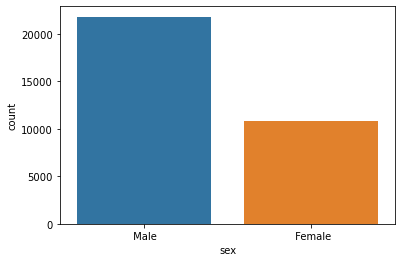

In [99]:
sns.countplot(x='sex',data=df)

<mark>2.What is the average age (age feature) of women?</mark>

In [141]:
#[df['sex']==' Female'] 
df[df['sex']==' Female']['age'].mean()

36.85823043357163

<mark>3.What is the proportion of German citizens (native-country feature)?</mark>

In [146]:
df['native-country'].unique() #какие страны вообще есть

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [182]:
(df[df['native-country']==" Germany"]['age'].count())  / df.shape[0] #137 Germany записей/все записи

0.004207487485028101

<mark>4-5. What are mean value and standard deviation of the age of those who recieve more than 50K per year (salary feature) and those who receive less than 50K per year?</mark

In [184]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [201]:
rich_mean_age=df[df['salary']==' >50K']['age'].mean()
rich_mean_age

44.24984058155847

In [204]:
other_mean_age=df[df['salary']==' <=50K']['age'].mean()
other_mean_age

36.78373786407767

In [211]:
rich_standart_devation=np.std(df[df['salary']==' >50K']['age'],ddof=0)
rich_standart_devation

10.518356927661575

In [210]:
other_standart_devation=np.std(df[df['salary']==' <=50K']['age'],ddof=0)
other_standart_devation

14.019804910115214

###### rich=44.24 +-10.51
###### other=36.78 +- 14.01

<mark>6. Is it true that people who receive more than 50k have at least high school education? </mark>

In [216]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [282]:

df_schoolboys=df[
    (df['salary']==' >50K') & (
        (df['education']==' 1st-4th' ) | (df['education']==' 5th-6th' ) | (df['education']==' 7th-8th')
         | (df['education']==' 9th') | (df['education']==' 10th')| (df['education']==' 11th')
                                ) 
    

                                                              ] # filtering only with education 1-11 class



df_schoolboys['age'].count()# I can see at least 211 people with not completed school education that have >50k 

211

<mark>7. Display statistics of age for each race (race feature) and each gender. Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race</mark>

In [310]:
statistics_of_age=df.groupby(by=['race','sex']).describe()['age']
statistics_of_age

count       mean        std   min   25%   50%  \
race                sex                                                        
 Amer-Indian-Eskimo  Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                     Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
 Asian-Pac-Islander  Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                     Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
 Black               Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                     Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
 Other               Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                     Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
 White               Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                     Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                               75%   max  
race                sex                   
 Amer-Indian-Eskimo  Female  46.00  80.0  
                     Male    45.00  82.0  
 Asian-Pac-Islander  Female  43.75  75.0  
                     Male    46.00  90.0  
 Black               Female  46.00  90.0  
                     Male    46.00  90.0  
 Other               Female  39.00  74.0  
                     Male    42.00  77.0  
 White               Female  46.00  90.0  
                     Male    49.00  90.0

In [311]:
#maximum age of men of Amer-Indian-Eskimo is 82

<mark>8. Among whom the proportion of those who earn a lot(>50K) is more: among married or single men (marital-status feature)? Consider married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.</mark>

In [314]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [338]:
df_married_and_rich=df[  (df['salary']==' >50K')  & ((df['marital-status']==' Married-civ-spouse') | (df['marital-status']==' Married-spouse-absent')
              | (df['marital-status']==' Married-AF-spouse')) 
             ]

In [340]:
df_single_and_rich=df[ (df['salary']==' >50K')  &  ((df['marital-status']!=' Married-civ-spouse') & (df['marital-status']!=' Married-spouse-absent')
              & (df['marital-status']!=' Married-AF-spouse')) 
             ]

In [342]:
df_married=df[(df['marital-status']==' Married-civ-spouse') | (df['marital-status']==' Married-spouse-absent')
              | (df['marital-status']==' Married-AF-spouse')]

In [343]:
df_single=df[(df['marital-status']!=' Married-civ-spouse') & (df['marital-status']!=' Married-spouse-absent')
              & (df['marital-status']!=' Married-AF-spouse')]

In [361]:
if (df_single_and_rich.shape[0] / df_single.shape[0] ) > (df_married_and_rich.shape[0] / df_married.shape[0]):
    print('percent of rich people is higher for marriage people')
    print(str(df_single_and_rich.shape[0] / df_single.shape[0]) +'=singe rich/all single' )
    print(str(df_married_and_rich.shape[0] / df_married.shape[0]) +'=married rich/all married')
else:
    print('percent of rich people is higher for marriage people')
    print(str(df_single_and_rich.shape[0] / df_single.shape[0]) +'=singe rich/all single' )
    print(str(df_married_and_rich.shape[0] / df_married.shape[0]) +'=married rich/all married')

percent of rich people is higher for marriage people
0.0644540363975735=singe rich/all single
0.43692028280469614=married rich/all married


<mark>9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours and what is the percentage of those who earn a lot among them?</mark>

In [363]:
df['hours-per-week'].max()#max hours per week

99

In [369]:
df[df['hours-per-week']==99].shape[0]#85 people work 99h/week

85

In [375]:
hardworkers_with_high_salary=df[  (df['hours-per-week']==99)  &  (df['salary']==' >50K')  ] #hardworkers with high salary

In [379]:
(hardworkers_with_high_salary.count()['age'] *100) /  (df[df['hours-per-week']==99].shape[0])
#percent of hardworkers(99h/week) with a high salary

29.41176470588235

<mark>10. Count the average time of work (hours-per-week) those who earning a little and a lot (salary) for each country (native-country).</mark>

In [384]:
df.groupby(by=['salary','native-country'])['hours-per-week'].mean() #varient 1, results are sorted

salary  native-country  
 <=50K   ?                  40.164760
         Cambodia           41.416667
         Canada             37.914634
         China              37.381818
         Columbia           38.684211
                              ...    
 >50K    Thailand           58.333333
         Trinadad&Tobago    40.000000
         United-States      45.505369
         Vietnam            39.200000
         Yugoslavia         49.500000
Name: hours-per-week, Length: 82, dtype: float64

In [386]:
pd.crosstab(df['native-country'], df['salary'],  # var2, you can compare countries 
           values=df['hours-per-week'], aggfunc=np.mean).T

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,
<=50K,40.164760,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,...,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
>50K,45.547945,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,...,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5
